# 1D Projection Schemes

There are three 1D algorithms in Chapter 5.  Here are fixed iteration count version in Julia

In [9]:
using LinearAlgebra, SparseArrays
#Steepest Descent Step from Alg 5.2 p138
#Assumption A is SPD
function SteepDes(A,x,p,r)
    alpha = dot(r,r)/dot(p,r)
    x+=alpha*r
    r-=alpha*p
    p=A*r
    return nothing
end

#Minimum Residual Step from Alg 5.3 p140
#Assumption A+A' is SPD
function MinRes(A,x,p,r)
    alpha = dot(p,r)/dot(p,p)
    x=x+alpha*r
    r=r-alpha*p
    p=A*r
    return nothing
end

#Residual Norm Step from Alg 5.4 p142
#Assumption A'A is non-singular
function ResNorm(A,x,r)
    v=A'*r
    Av=A*v
    alpha = dot(v,v)/dot(Av,Av)
    x=x+alpha*v
    r=r-alpha*Av
    return nothing
end
;

# Assumptions
The assumptiions are real:

- Just because an algorithm runs does not mean it is converging! 
- Algorithms will (almost certainly) fail to converge on matrices that fail to satisfy the assumptions.
- SD has the most stringent assuptions followed by MR followed by RN.
- The assumptions for RN are *almost* non existent.

# Comparison
As a test I am going to copare all three on a randomly generated SPD matrix. 

  0.008573 seconds (7.79 k allocations: 679.611 KiB, 91.55% compilation time)
  0.000414 seconds (3.77 k allocations: 491.125 KiB)


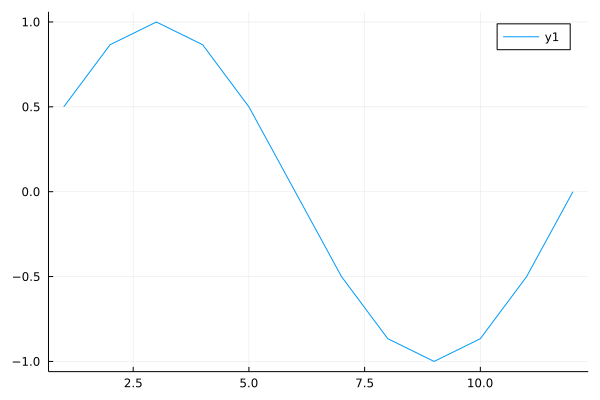

In [44]:
using Plots
# Creating an SPD test problem
m=12; eps=0.1
A=rand(m,m); A=A*A'+ eps*I
x0=rand(m);xStar=sin.(2*pi/m*(1:m));b=A*xStar
# Making Storage for errors ||x-xStar|| and ||b-A*x||
MaxIter=532;
SDErrs=zeros(MaxIter,2); MRerrs=zeros(MaxIter,2); NRErrs=zeros(MaxIter,2)

#Steepest Descent Step from Alg 5.2 p138
#Assumption A is SPD
function SteepDes(A,x,p,r)
    alpha = dot(r,r)/dot(p,r)
    x+=alpha*r
    r-=alpha*p
    p=A*r
    return (x,p,r)
end

function SteepDes2(A,x,p,r)
    alpha = dot(r,r)/dot(p,r)
    x+=alpha*r
    r-=alpha*p
    p=A*r
end

# SD
xPass=copy(x0);r=b-A*x0;p=A*r
@time for i in 1:MaxIter
    (xPass,p,r) = SteepDes(A,xPass,p,r)
end

xNoPass=copy(x0);r=b-A*x0;p=A*r
@time for i in 1:MaxIter
    SteepDes(A,xNoPass,p,r)
end

plot(xPass)
# plot(xNoPass)

In [35]:
x

12-element Vector{Float64}:
  0.18123575844801273
  0.4889376122211213
  0.5720295120797628
  0.6733227051940649
  0.6124962955843166
 -0.1830299139109456
 -0.3661059033124773
 -0.6525749445533481
 -0.6266820798241951
 -0.7143279639688451
 -0.12891401523728097
  0.1775002809104431